# Time Series - 1 Graded assessment

### DATA_SET:

Analytics firm wants to forecast the Price of Mindtree Ltd. stock for the month of Dec 2021. For this, firm has gathered a Closing Stock Price data for the period of Dec 2020 to Nov 2021.

* date ==			date field	
* Closing == 	    Daily Closing Price of Stock (numeric)

#### 1.	Data preparation (5 marks)


a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). What are the number of rows and no. of cols & types of variables? (1 MARK)

b. convert the data into time series (2 MARK)


c. Check for defects in the data such as missing values, null, etc. (1 MARK)

d. Visualize the time series using relevant plots. (1 MARK)


In [1]:
import pandas                             as      pd
import numpy                              as      np
import matplotlib.pyplot                  as      plt
import seaborn                            as      sns
from   pylab                              import  rcParams 
from   datetime                           import  datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df=pd.read_csv("data_set.csv")

In [2]:
df.head()

,Date,Avg spending
0,04-02-2019,62.58
1,05-02-2019,64.27
2,06-02-2019,63.44
3,07-02-2019,61.50
4,08-02-2019,61.16


In [3]:
df.tail()

,Date,Avg spending
600,26-09-2020,623.71
601,27-09-2020,656.57
602,28-09-2020,679.82
603,29-09-2020,671.87
604,30-09-2020,688.72


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          605 non-null    object 
 1   Avg spending  605 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.6+ KB


In [5]:
from pandas.tseries.offsets import BDay
date = pd.date_range(start='12/04/2020', end='12/01/2021', freq=BDay())
date[0:263]

DatetimeIndex(['2020-12-04', '2020-12-07', '2020-12-08', '2020-12-09',
               '2020-12-10', '2020-12-11', '2020-12-14', '2020-12-15',
               '2020-12-16', '2020-12-17',
               ...
               '2021-11-18', '2021-11-19', '2021-11-22', '2021-11-23',
               '2021-11-24', '2021-11-25', '2021-11-26', '2021-11-29',
               '2021-11-30', '2021-12-01'],
              dtype='datetime64[ns]', length=259, freq='B')

In [6]:
date = pd.date_range(start='1/1/2018', end='4/10/2019', freq='D')
date

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05', '2019-04-06', '2019-04-07', '2019-04-08',
               '2019-04-09', '2019-04-10'],
              dtype='datetime64[ns]', length=465, freq='D')

In [7]:
df['TimeStamp'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

#df['TimeStamp']=pd.DataFrame(date,columns=['date'])
df = df.set_index('TimeStamp')
df=df.drop('Date',axis=1)
df

,Avg spending
TimeStamp,
2019-02-04,62.58
2019-02-05,64.27
2019-02-06,63.44
2019-02-07,61.50
2019-02-08,61.16
...,...
2020-09-26,623.71
2020-09-27,656.57
2020-09-28,679.82


In [8]:
df.isnull().sum()

Avg spending    0
dtype: int64

<AxesSubplot:xlabel='TimeStamp'>

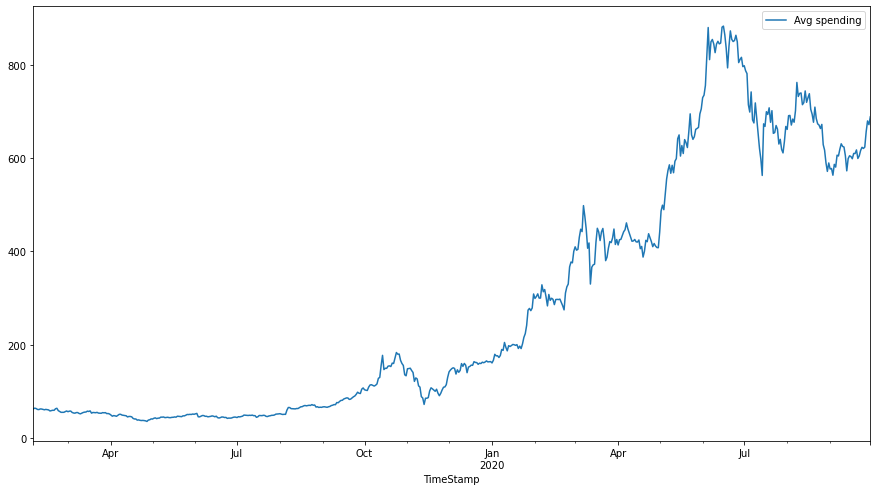

In [9]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
df.plot()

#### 2.	Data understanding (15 marks)

a.	Decompose the time series and check for time series components. (4 marks)

b.	Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary?(3+1 marks)

c.	Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots? (2+2 marks)

d.	Split dataset into train and test sets. Use last two month data for testing. (3 marks)



In [10]:
### a. Decompose the time series and check for time series components. (4 marks)

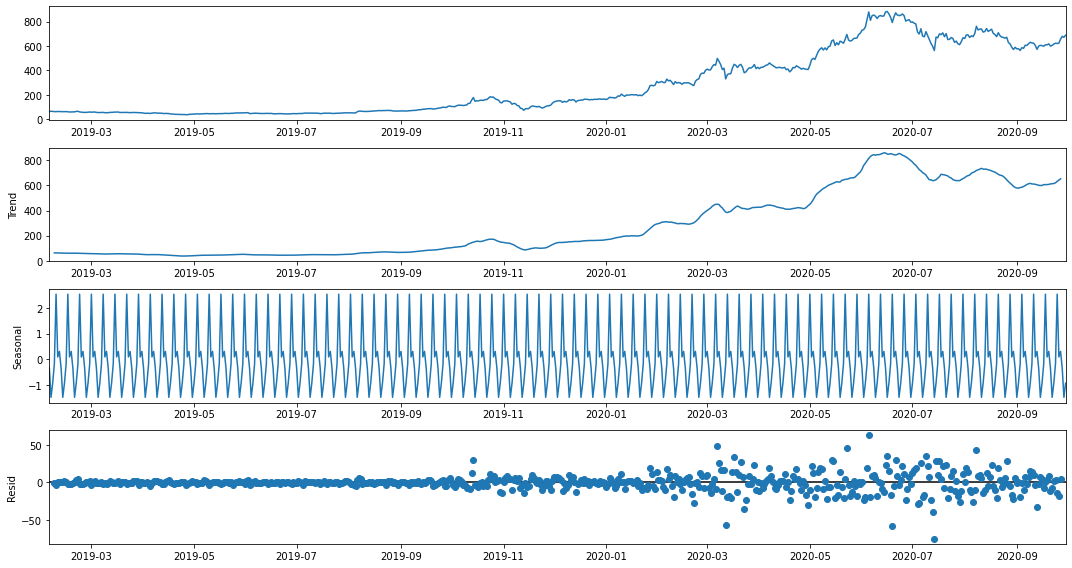

In [11]:
from statsmodels.tsa.seasonal             import  seasonal_decompose
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();

In [12]:
### b. Perform dicky fuller test to check the stationarity? What other actions will you take if series is non-stationary?(3+1 marks)

In [13]:
from statsmodels.tsa.stattools            import  adfuller
observations= df.values
test_result = adfuller(observations)
test_result

(-0.30908265623618264,
 0.9242080692970704,
 9,
 595,
 {'1%': -3.441388211993052,
  '5%': -2.8664097967491498,
  '10%': -2.569363480686392},
 4908.380183800914)

In [14]:
####series is non-stationary. applying 1st order differencing

In [15]:
df_diff = df.diff(periods=1).dropna()
observations= df_diff.values
test_result = adfuller(observations)
test_result

(-6.731902702457797,
 3.279870523197202e-09,
 8,
 595,
 {'1%': -3.441388211993052,
  '5%': -2.8664097967491498,
  '10%': -2.569363480686392},
 4899.107905068978)

In [16]:
### c. Plot AutoCorrelation and Partial AutoCorrelation function? What is your inference from these plots? (2+2 marks)

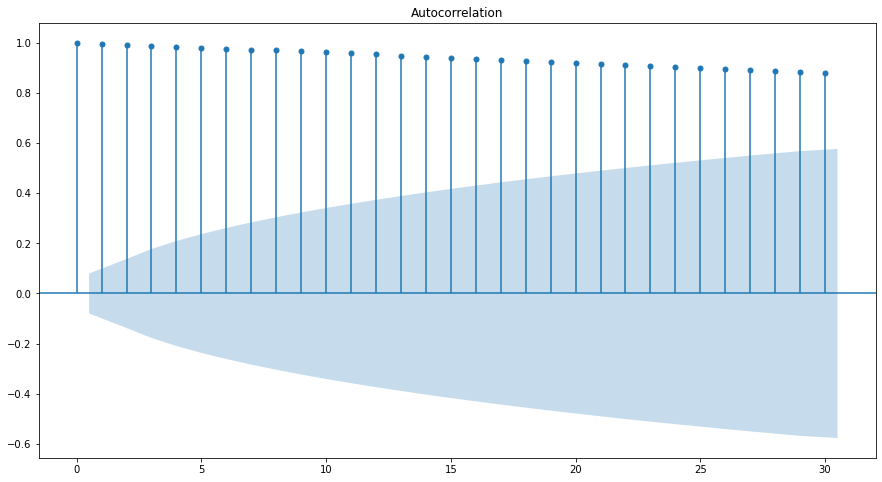

In [17]:
from statsmodels.graphics.tsaplots import  plot_acf,plot_pacf
plot_acf(df,lags=30);

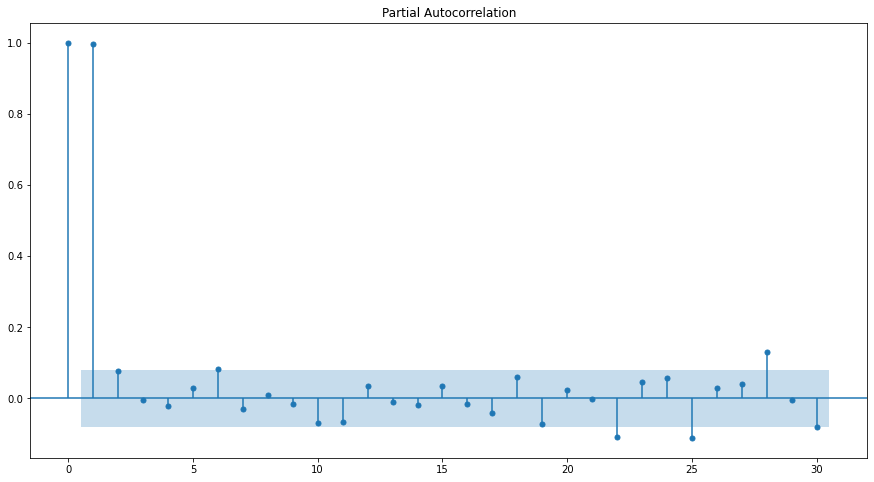

In [18]:
plot_pacf(df,lags=30);

In [19]:
##### Original series is showing AR characteristics as ACF plot is decaying slowly, while PACF is showing limited number of spikes before cut-off.

In [20]:
### d. Split dataset into train and test sets. Use last two month data for testing. (3 marks)

In [21]:
train_end=datetime(2020,7,30)
test_end=datetime(2020,9,1)
train             = df[:train_end] 
test              = df[train_end + timedelta(days=1):test_end]

In [22]:
train.shape

(543, 1)

In [23]:
test.shape

(33, 1)


### 3.	Model Building (20 marks)

a.	Fit a base model and observe the residuals, RMSE and MAPE values of the model. Please comment on whether it is good or not.  (5 marks)

c.	How would you improve the model? What changes you will make in the base model. Fit the final model.   (10 marks)

d.	Analyze the residuals of final model. Feel free to use charts or graphs to explain. (2 marks) 

e.	Forecast the Close price for next 1 months using the final model? (3 marks)


### Base Model using ARIMA

In [24]:
from statsmodels.tsa.arima_model import  ARIMA
import itertools
p = q = range(0, 4)
d= range(0,2)
pdq = list(itertools.product(p, d, q))
print('parameter combinations for the Model')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

parameter combinations for the Model
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 0, 3)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 0, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 0, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 0, 0)
Model: (3, 0, 1)
Model: (3, 0, 2)
Model: (3, 0, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [25]:
dfObj1 = pd.DataFrame(columns=['param', 'AIC'])
dfObj1

,param,AIC


In [26]:
for param in pdq:
            try:
                mod = ARIMA(train, order=param)
                results_Arima = mod.fit()
                print('ARIMA{} - AIC:{}'.format(param, results_Arima.aic))
                dfObj1 = dfObj1.append({'param':param, 'AIC': results_Arima.aic}, ignore_index=True)

            except:
                continue

C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(0, 0, 0) - AIC:7512.778671736689
ARIMA(0, 0, 1) - AIC:6814.995405352653
ARIMA(0, 0, 2) - AIC:6247.105744946462
ARIMA(0, 0, 3) - AIC:5887.993196061867
ARIMA(0, 1, 0) - AIC:4507.985110657532
ARIMA(0, 1, 1) - AIC:4506.818387789099


C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

ARIMA(0, 1, 2) - AIC:4508.728717443145
ARIMA(0, 1, 3) - AIC:4507.871170243013
ARIMA(1, 0, 0) - AIC:4526.207009028862


C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

ARIMA(1, 0, 3) - AIC:4526.084315545568
ARIMA(1, 1, 0) - AIC:4506.956269164459
ARIMA(1, 1, 1) - AIC:4508.788015429635
ARIMA(1, 1, 2) - AIC:4510.484383168447


C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

ARIMA(1, 1, 3) - AIC:4509.733670854035
ARIMA(2, 0, 0) - AIC:4525.613751997927


C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(2, 0, 3) - AIC:4527.871411965663
ARIMA(2, 1, 0) - AIC:4508.462534781216
ARIMA(2, 1, 1) - AIC:4510.132237766526


C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

ARIMA(2, 1, 3) - AIC:4484.243289487702
ARIMA(3, 0, 0) - AIC:4527.299332622995


C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 0, 3) - AIC:4524.26588615289
ARIMA(3, 1, 0) - AIC:4508.129721080556
ARIMA(3, 1, 1) - AIC:4509.606075275565


C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

ARIMA(3, 1, 2) - AIC:4484.240533452716


C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ARIMA(3, 1, 3) - AIC:4485.831008604007


C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [27]:
dfObj1.sort_values(by=['AIC'])

,param,AIC
23,"(3, 1, 2)",4484.240533
18,"(2, 1, 3)",4484.243289
24,"(3, 1, 3)",4485.831009
5,"(0, 1, 1)",4506.818388
10,"(1, 1, 0)",4506.956269
7,"(0, 1, 3)",4507.871170
4,"(0, 1, 0)",4507.985111
21,"(3, 1, 0)",4508.129721
16,"(2, 1, 0)",4508.462535
6,"(0, 1, 2)",4508.728717


In [28]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train, order=(2,1,3))
results_Arima = model.fit()
print(results_Arima.summary())

C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:           Avg spending   No. Observations:                  543
Model:                 ARIMA(2, 1, 3)   Log Likelihood               -2237.443
Date:                Sat, 03 Sep 2022   AIC                           4486.885
Time:                        13:55:50   BIC                           4512.657
Sample:                    02-04-2019   HQIC                          4496.963
                         - 07-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1613      0.012     13.735      0.000       0.138       0.184
ar.L2         -0.9590      0.011    -86.565      0.000      -0.981      -0.937
ma.L1         -0.2356      0.031     -7.597      0.0

C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
ARIMA_predictions=results_Arima.forecast(len(test))

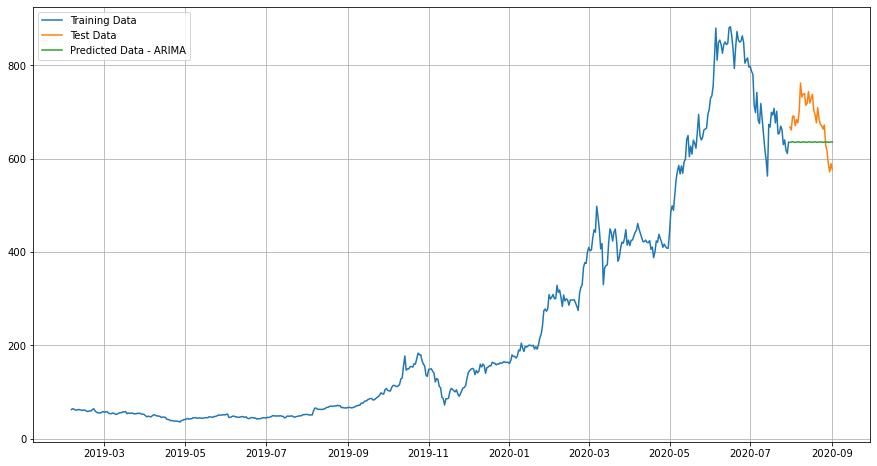

In [30]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,ARIMA_predictions,label='Predicted Data - ARIMA')
plt.legend(loc='best')
plt.grid();

In [31]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Avg spending'],ARIMA_predictions, squared=False)
print(rmse)

67.44353522930685


In [32]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

mape=MAPE(test['Avg spending'].values,ARIMA_predictions[0])
print(mape)

8.822676109833065


In [33]:
### Those Model MAPE is less that 10%. Model is not capturing the trend

### Model Improvement

#### Will use Exponential Smoothing model

In [34]:
from statsmodels.tsa.api                  import  ExponentialSmoothing

model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(optimized=True)
model_TES.summary()

C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,Avg spending,No. Observations:,543
Model:,ExponentialSmoothing,SSE,127361.185
Optimized:,True,AIC,2985.516
Trend:,Additive,BIC,3032.785
Seasonal:,Additive,AICC,2986.205
Seasonal Periods:,7,Date:,"Sat, 03 Sep 2022"
Box-Cox:,False,Time:,13:56:10
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9226556,alpha,True
smoothing_trend,0.0003242,beta,True


In [35]:
TES_predictions =  model_TES.forecast(len(test))

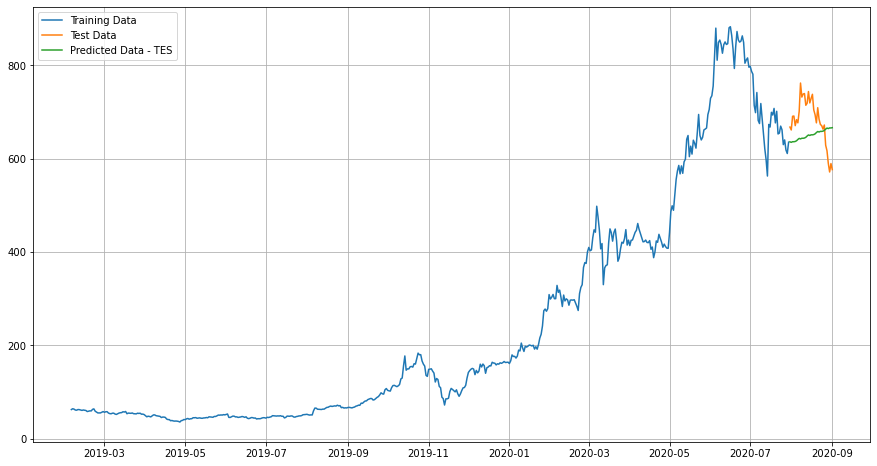

In [36]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Predicted Data - TES')
plt.legend(loc='best')
plt.grid();

In [37]:
rmse = mean_squared_error(test['Avg spending'],TES_predictions.values, squared=False)
print(rmse)

63.56596692537537


In [38]:
mape=MAPE(test['Avg spending'].values,TES_predictions.values)
print(mape)

8.258203398290135


#### Model Tuning

In [39]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit(smoothing_level=0.9542595,smoothing_trend=0.00607340,smoothing_seasonal=0.00158913,optimized=False)
model_TES.summary()

C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,Avg spending,No. Observations:,543
Model:,ExponentialSmoothing,SSE,129077.005
Optimized:,False,AIC,2992.783
Trend:,Additive,BIC,3040.051
Seasonal:,Additive,AICC,2993.471
Seasonal Periods:,7,Date:,"Sat, 03 Sep 2022"
Box-Cox:,False,Time:,13:56:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9542595,alpha,False
smoothing_trend,0.0060734,beta,False


In [40]:
TES_predictions =  model_TES.forecast(len(test))

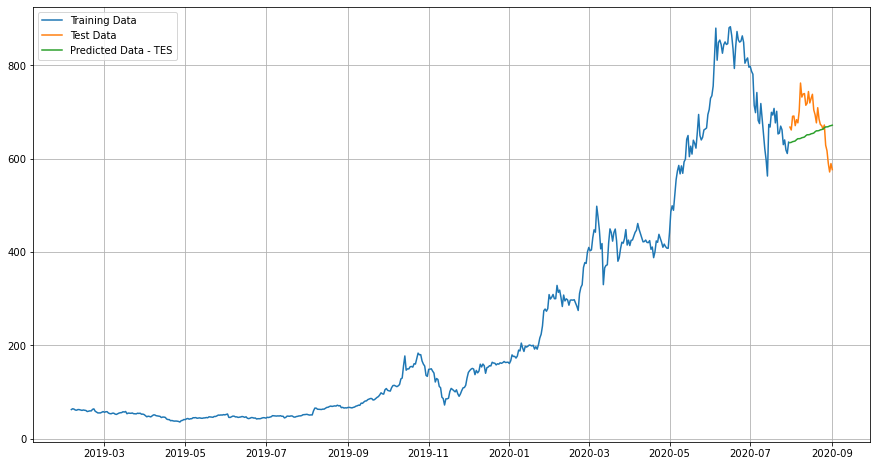

In [41]:
plt.plot(train,label='Training Data')
plt.plot(test,label='Test Data')
plt.plot(test.index,TES_predictions,label='Predicted Data - TES')
plt.legend(loc='best')
plt.grid();

In [42]:
rmse = mean_squared_error(test['Avg spending'],TES_predictions.values, squared=False)
print(rmse)

63.312654932387844


In [43]:
mape=MAPE(test['Avg spending'].values,TES_predictions.values)
print(mape)

8.146425355752356


### Residual Analysis

In [44]:
residuals = test['Avg spending'].values-TES_predictions.values

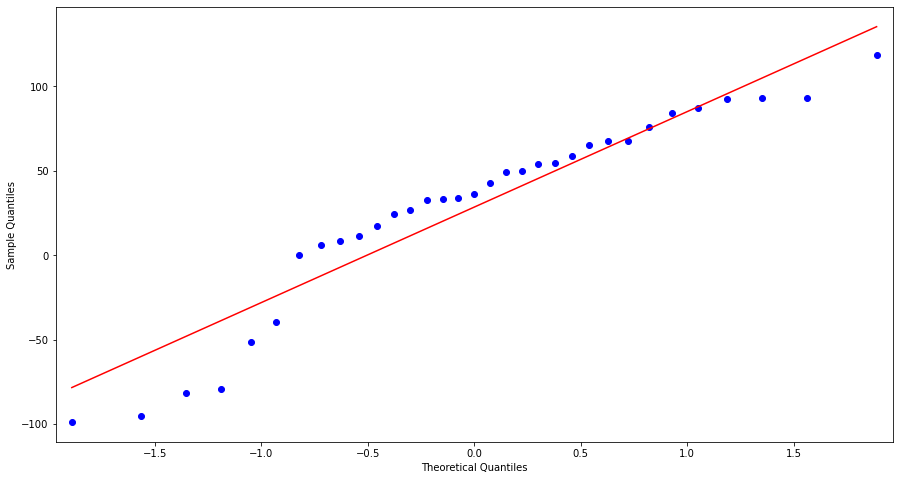

In [45]:
from statsmodels.graphics.gofplots        import  qqplot
qqplot(residuals,line="s");

In [46]:
### residual points are falling approximately along this reference line.

### Forecast Using Final Model

In [47]:
model_TES = ExponentialSmoothing(df,trend='additive',seasonal='additive',initialization_method='estimated')

C:\Users\Vivekanand\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [48]:
model_TES = model_TES.fit(smoothing_level=0.9542595,smoothing_trend=0.00607340,smoothing_seasonal=0.00158913,optimized=False)
model_TES.summary()

Dep. Variable:,Avg spending,No. Observations:,605
Model:,ExponentialSmoothing,SSE,152977.356
Optimized:,False,AIC,3369.354
Trend:,Additive,BIC,3417.812
Seasonal:,Additive,AICC,3369.970
Seasonal Periods:,7,Date:,"Sat, 03 Sep 2022"
Box-Cox:,False,Time:,13:56:24
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9542595,alpha,False
smoothing_trend,0.0060734,beta,False


In [49]:
forecast= model_TES.forecast(30)

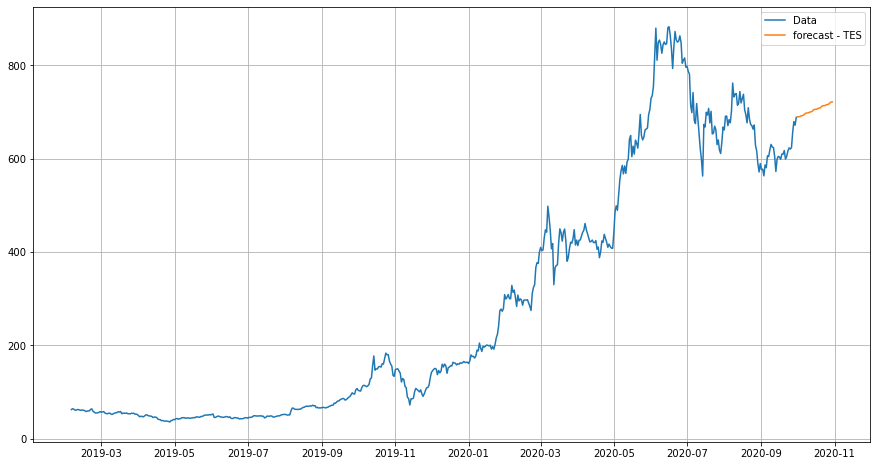

In [50]:
plt.plot(df,label='Data')
plt.plot(forecast,label='forecast - TES')
plt.legend(loc='best')
plt.grid();

#### END